# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [7]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### 시드(seed) 고정  

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [9]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head(5)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [10]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']


In [11]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소


#### train , validation data 나누기

In [12]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### 라벨인코딩(Label Encoding) 

In [13]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    
    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])

    

#### 모델 정의

In [14]:
model = DecisionTreeClassifier(random_state = 42)

### 그리드 서치

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    
    'max_depth': [1,3,5,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 초기화
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')

# 그리드 서치 수행
grid_search.fit(X_tr, Y_tr)
# 최적의 하이퍼파라미터 및 모델 성능 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 정확도:", grid_search.best_score_)

# 테스트 세트에서 모델 평가
test_accuracy = grid_search.best_estimator_.score(X_val, Y_val)
print("테스트 세트 정확도:", test_accuracy)

최적의 하이퍼파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적의 교차 검증 정확도: 0.5110850236776505
테스트 세트 정확도: 0.5536666271768748


#### 모델 학습

In [20]:
model=DecisionTreeClassifier(random_state=42,max_depth=8, min_samples_leaf= 1, min_samples_split=2)
model.fit(X_tr, Y_tr)

DecisionTreeClassifier(max_depth=8, random_state=42)

#### 예측

In [21]:
# predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
pred = model.predict(X_val)

정확도 : 0.5537
정말도 : 0.5505
Recall: 0.5537
F1 Score: 0.5432
Confusion Matrix:
[[5361  874 1056]
 [1965 2275  895]
 [2059  686 1711]]


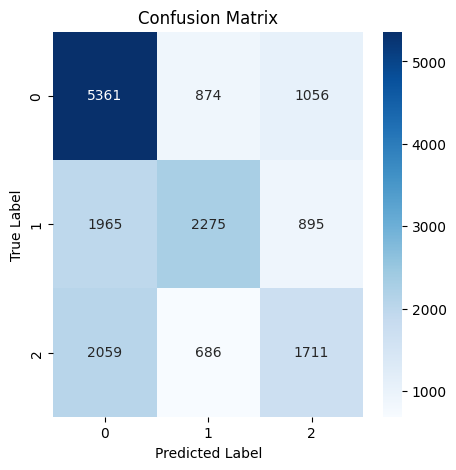

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# gridSeach를 통해 성능개선된 것 확인

"""
DT : 

정확도 : 0.4451
정말도 : 0.4465
Recall: 0.4451
F1 Score: 0.4458
Confusion Matrix:
[[3690 1760 1841]
 [1738 2229 1168]
 [1730 1131 1595]]

 """

# 기본 모델의 성능과 비교해보았을 때, 모든 지표에서 더 좋은 결과 보임

### RFE

In [23]:
from sklearn.feature_selection import RFE

In [24]:
for n_features in range(1, 17):
    # RFE를 사용하여 특성 선택
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    X_train_rfe = rfe.fit_transform(X_tr, Y_tr)
    X_test_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, Y_tr)
    y_pred_rf = model.predict(X_test_rfe)

    accuracy_rf = accuracy_score(Y_val, y_pred_rf)
    print(f'n_features_to_select={n_features}, Accuracy: {accuracy_rf:.3f}')

n_features_to_select=1, Accuracy: 0.530
n_features_to_select=2, Accuracy: 0.554
n_features_to_select=3, Accuracy: 0.555
n_features_to_select=4, Accuracy: 0.555
n_features_to_select=5, Accuracy: 0.553
n_features_to_select=6, Accuracy: 0.552
n_features_to_select=7, Accuracy: 0.553
n_features_to_select=8, Accuracy: 0.553
n_features_to_select=9, Accuracy: 0.554
n_features_to_select=10, Accuracy: 0.554
n_features_to_select=11, Accuracy: 0.553
n_features_to_select=12, Accuracy: 0.553
n_features_to_select=13, Accuracy: 0.554
n_features_to_select=14, Accuracy: 0.554
n_features_to_select=15, Accuracy: 0.554
n_features_to_select=16, Accuracy: 0.554
